# Affinity Propagation

Install the apcluster package

In [14]:
install.packages("apcluster")
library(apcluster)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘apcluster’


The following object is masked from ‘package:stats’:

    heatmap





APResult object

Number of samples     =  150 
Number of iterations  =  147 
Input preference      =  -0.02834394 
Sum of similarities   =  -0.2981782 
Sum of preferences    =  -0.2550955 
Net similarity        =  -0.5532737 
Number of clusters    =  9 

Exemplars:
   23 32 35 41 69 114 123 125 130
Clusters:
   Cluster 1, exemplar 23:
      4 12 16 18 23 31 43 70 85 91
   Cluster 2, exemplar 32:
      1 3 5 9 10 14 25 30 32 45 47 48 54 61 68 71 77 86 90 93 97 100
   Cluster 3, exemplar 35:
      17 19 21 24 27 28 29 33 34 35 37 40 52 53 56 62 63 72 73 76 78 80 83 84 
      88 89 98 99
   Cluster 4, exemplar 41:
      39 41 44 50 67 74 75 81 94
   Cluster 5, exemplar 69:
      2 6 7 8 11 13 15 20 22 26 36 38 42 46 49 51 55 57 58 59 60 64 65 66 69 79 
      82 87 92 95 96
   Cluster 6, exemplar 114:
      105 108 112 114 128 131 137 141
   Cluster 7, exemplar 123:
      101 106 113 115 117 119 121 123 124 126 127 133 136 140 146 147
   Cluster 8, exemplar 125:
      102 104 107 109 110 

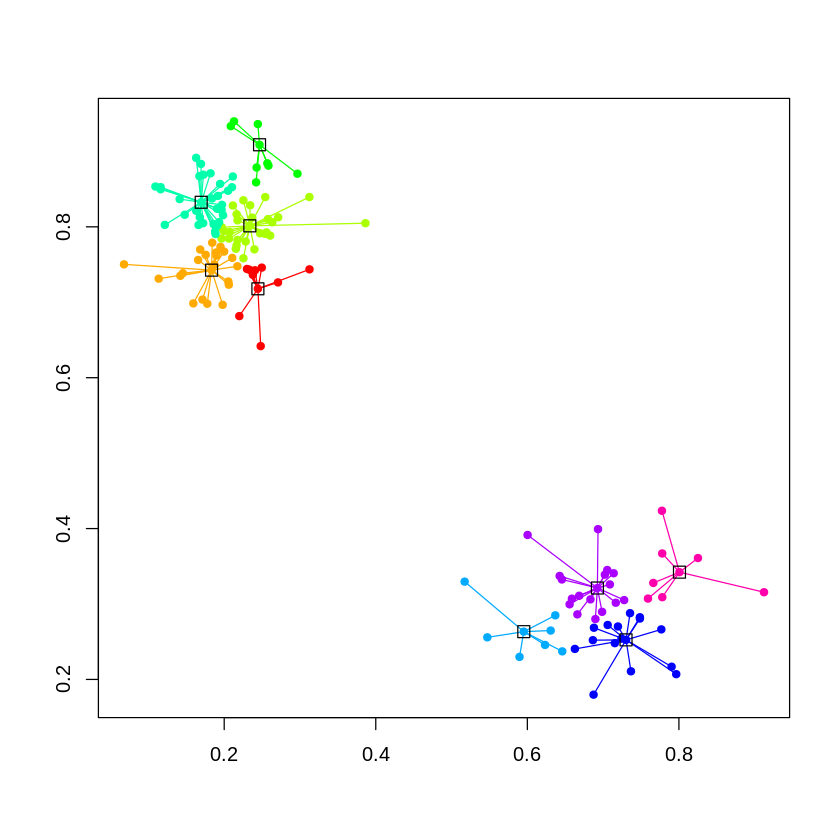

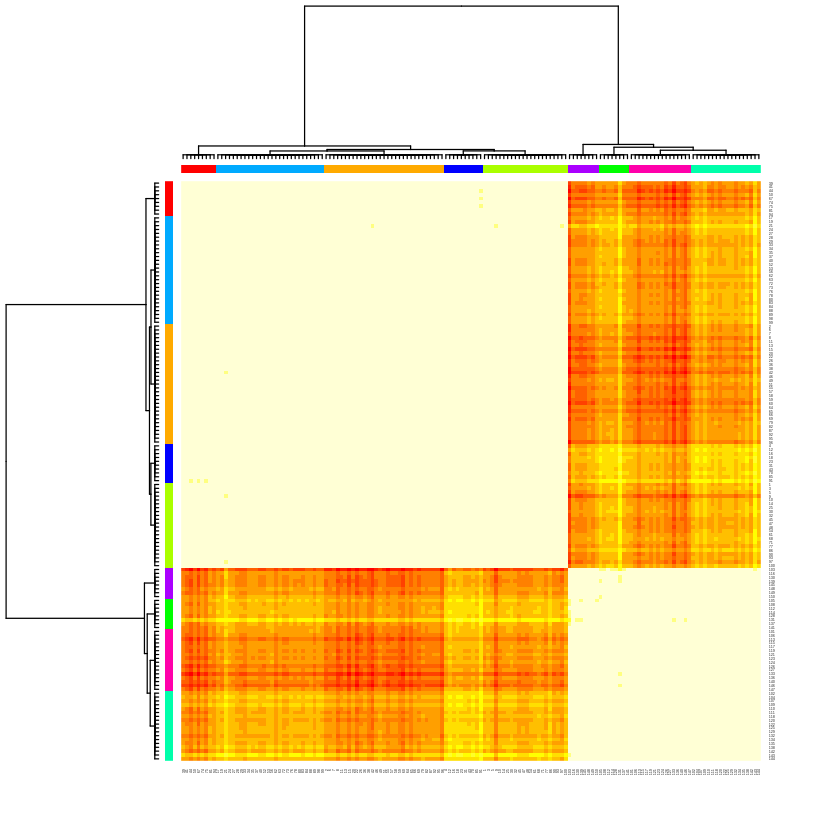

In [17]:
# rnorm(num of values, mean, var)
cl1 <- cbind(rnorm(100, 0.2, 0.05), rnorm(100, 0.8, 0.06))
cl2 <- cbind(rnorm(50, 0.7, 0.08), rnorm(50, 0.3, 0.05))
x <- rbind(cl1, cl2)

apres <- apcluster(negDistMat(r=2), x, details=TRUE)
apres   # returns the affinity propagation results

## plot clustering result
plot(apres, x)
## plot heatmap
heatmap(apres)


APResult object

Number of samples     =  150 
Number of iterations  =  130 
Input preference      =  -0.5922786 
Sum of similarities   =  -0.9257694 
Sum of preferences    =  -1.184557 
Net similarity        =  -2.110326 
Number of clusters    =  2 

Exemplars:
   83 142
Clusters:
   Cluster 1, exemplar 83:
      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 
      28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 
      52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 
      76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
      100
   Cluster 2, exemplar 142:
      101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 
      119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 
      137 138 139 140 141 142 143 144 145 146 147 148 149 150

APResult object

Number of samples     =  150 
Number of iterations  =  132 
Input preference      =  0.593447 
Su


APResult object

Number of samples     =  40 
Number of iterations  =  134 
Input preference      =  -0.1004991 
Sum of similarities   =  -0.3180168 
Sum of preferences    =  -0.2009981 
Net similarity        =  -0.5190149 
Number of clusters    =  2 

Exemplars:
   2 36
Clusters:
   Cluster 1, exemplar 2:
      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
   Cluster 2, exemplar 36:
      21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40

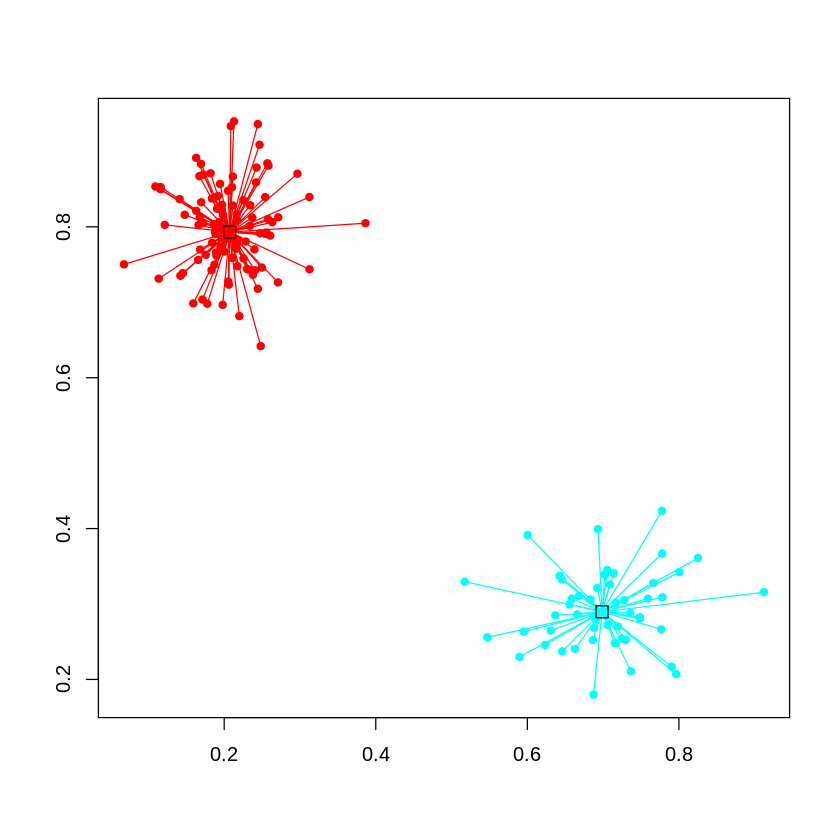

In [18]:
apres <- apcluster(s=apres@sim, q=0.1)
show(apres)
plot(apres, x)

## now try the same with RBF kernel
sim <- expSimMat(x, r=2)
apres <- apcluster(s=sim, q=0.2)
show(apres)
plot(apres, x)

## create sparse similarity matrix
cl1 <- cbind(rnorm(20, 0.2, 0.05), rnorm(20, 0.8, 0.06))
cl2 <- cbind(rnorm(20, 0.7, 0.08), rnorm(20, 0.3, 0.05))
x <- rbind(cl1, cl2)

sim <- negDistMat(x, r=2)
ssim <- as.SparseSimilarityMatrix(sim, lower=-0.2)

## run apcluster() on the sparse similarity matrix
apres <- apcluster(ssim, q=0)
apres
# }


A different example:

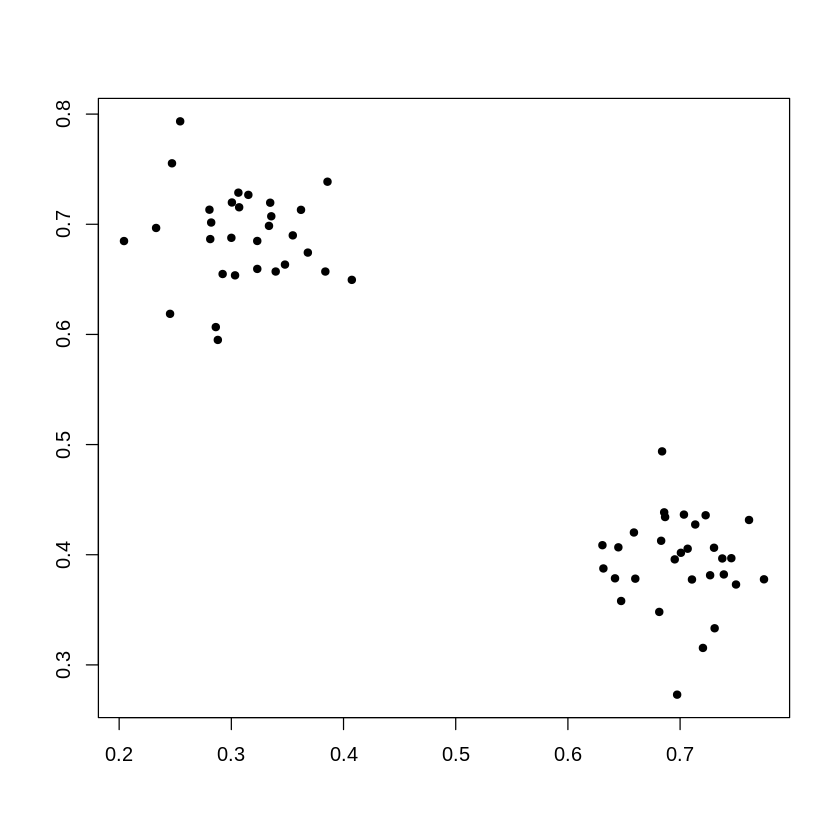

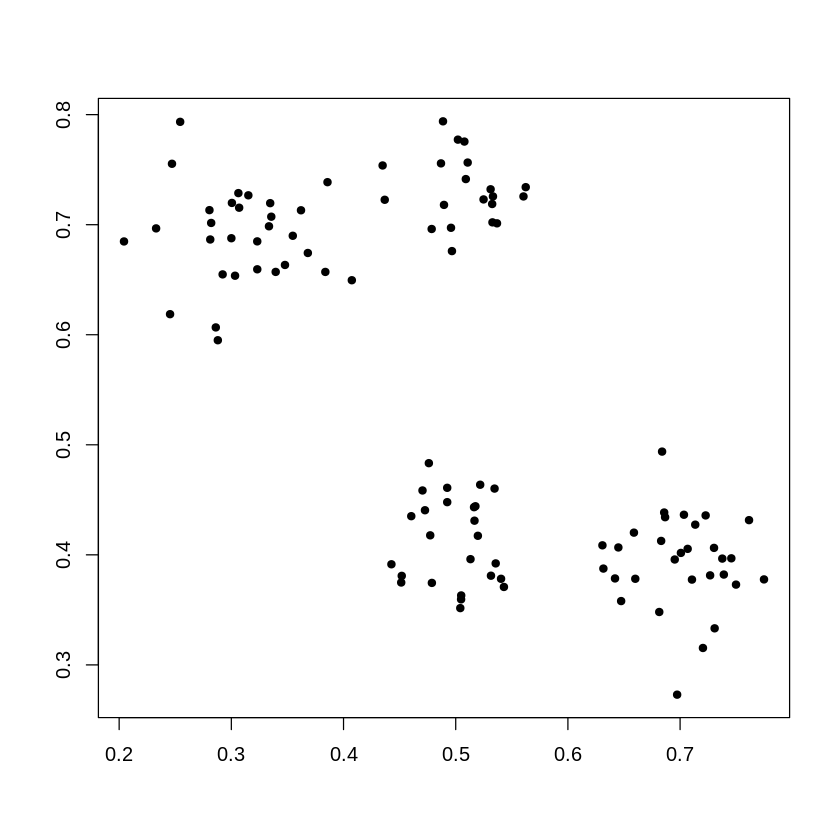

In [19]:
cl1 <- cbind(rnorm(30, 0.3, 0.05), rnorm(30, 0.7, 0.04))
cl2 <- cbind(rnorm(30, 0.7, 0.04), rnorm(30, 0.4, .05))
x1 <- rbind(cl1, cl2)
plot(x1, xlab="", ylab="", pch=19, cex=0.8)
cl3 <- cbind(rnorm(20, 0.50, 0.03), rnorm(20, 0.72, 0.03))
cl4 <- cbind(rnorm(25, 0.50, 0.03), rnorm(25, 0.42, 0.04))
x2 <- rbind(x1, cl3, cl4)
plot(x2, xlab="", ylab="", pch=19, cex=0.8)

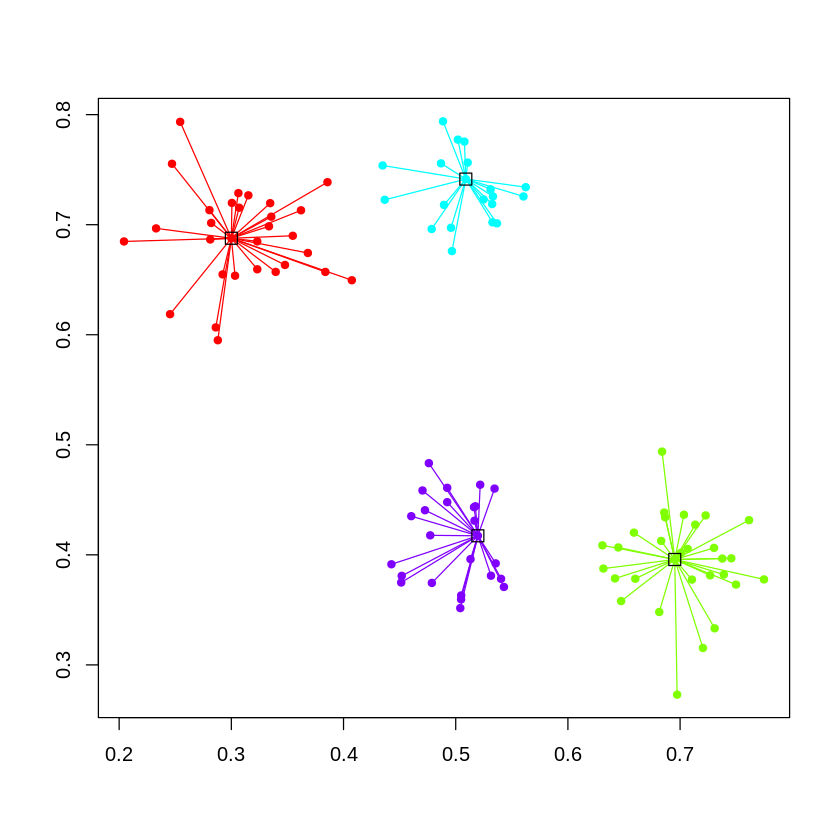

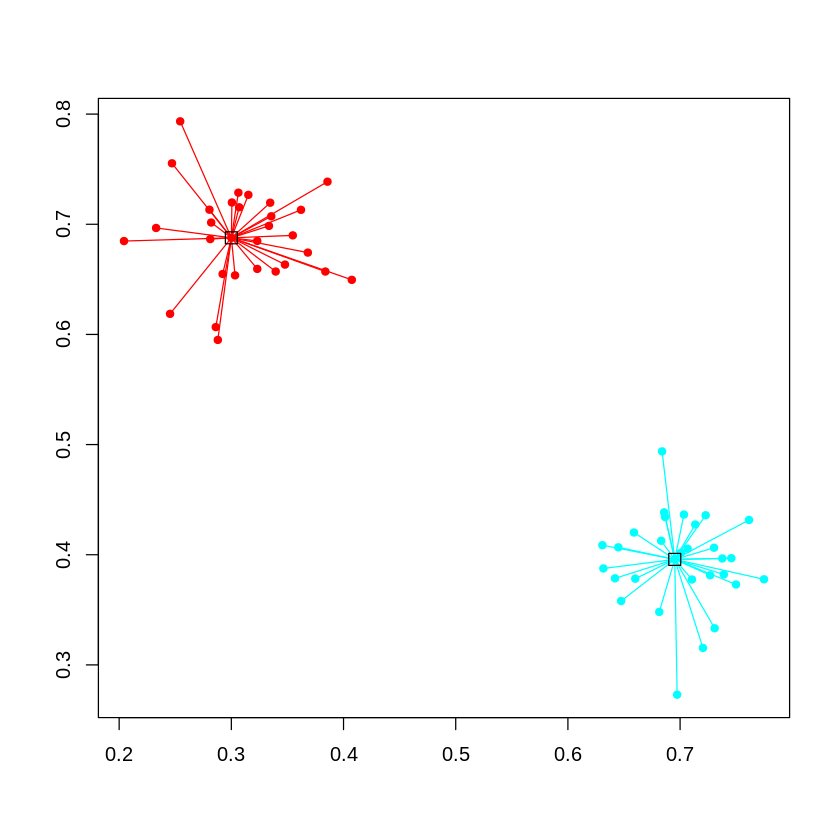

In [22]:
apres2a <- apcluster(negDistMat(r=2), x2)
plot(apres2a, x2)

apres1a <- apcluster(negDistMat(r=2), x1)
plot(apres1a, x1)

Adjusting input preferances

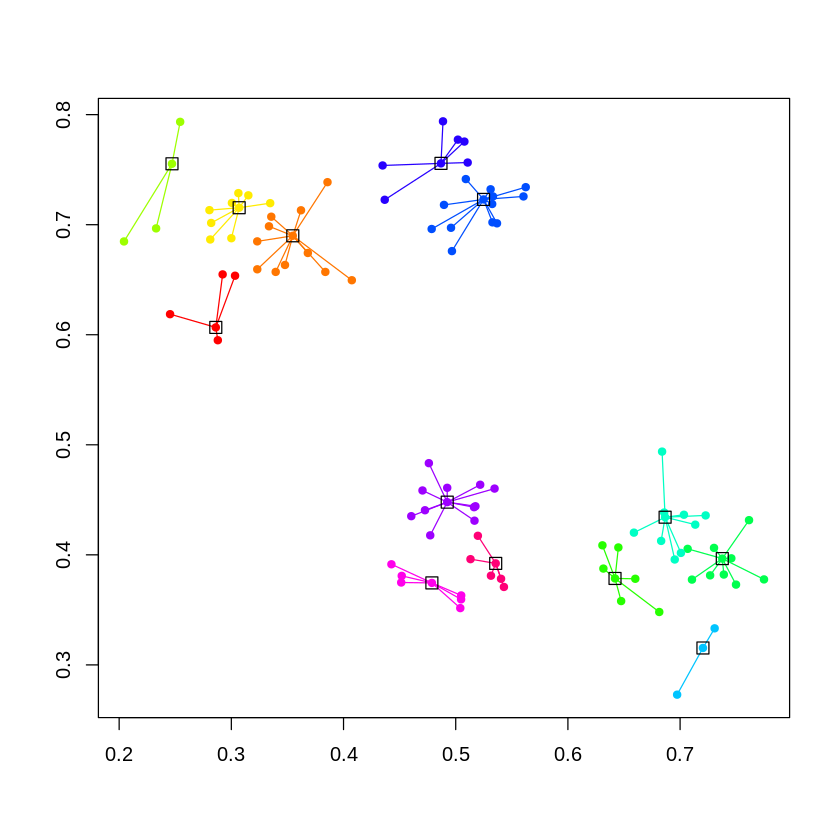

In [23]:
apres2c <- apcluster(negDistMat(r=2), x2, q=0.8)
plot(apres2c, x2)

 Adding a legend to plots of clustering results

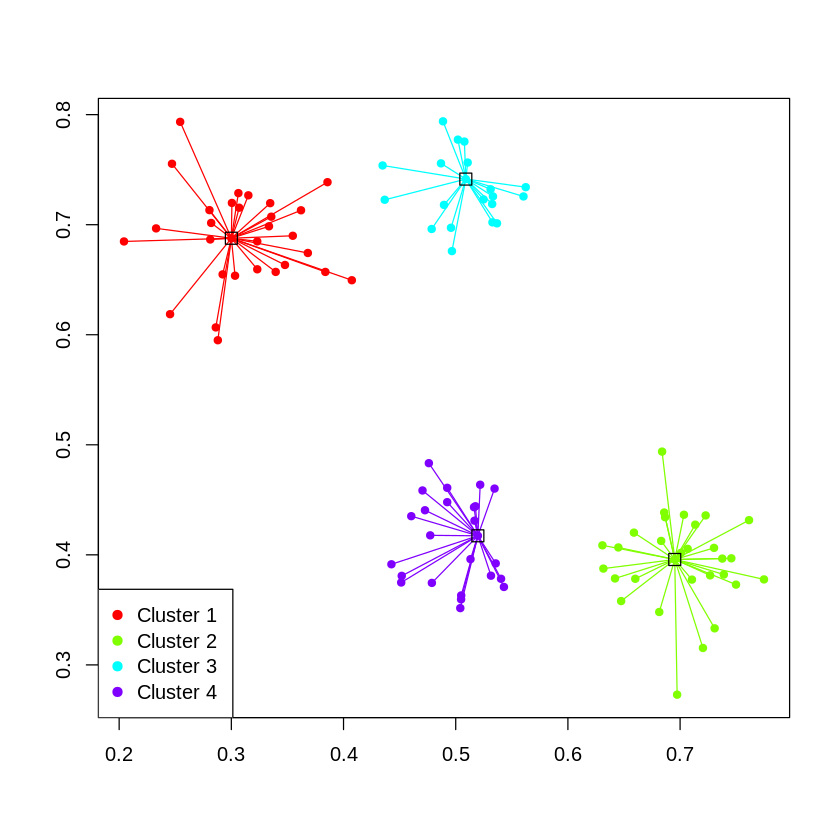

In [24]:
plot(apres2a, x2)
legend("bottomleft", legend=paste("Cluster", 1:length(apres2a)),
col=rainbow(length(apres2a)), pch=19)

# Pneumonia Detection from Chest X-Rays

Download the data from here: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/

Change the runtime to Python to mount your Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Change the runtime back to R.

## Set up

In [1]:
# Install and load the keras package
install.packages("keras")
library(keras)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘tfautograph’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’




In [2]:
train_dir = '/content/drive/MyDrive/chest_xray/train'
validation_dir = '/content/drive/MyDrive/chest_xray/val'
test_dir = '/content/drive/MyDrive/chest_xray/test'

# Loading Images
The augmentation now creates many variations on the training images, such as rotations, skews, mirrors, etc. This effectively increases the size of the training data. We shouldn’t do any of this for the test sets.

All the data is rescaled by dividing by 255. This means that pixel values are now from 0 to 1.

In [6]:
#Create Keras Generators

set.seed(123)

#The train generator uses augmentation,
train_datagen = image_data_generator(
  rescale = 1/255,          # scaling the image
  rotation_range = 5,       # giving some image some rotation
  width_shift_range = 0.1,
  height_shift_range = 0.05,
  shear_range = 0.1,        # distorting some images a little bit
  zoom_range = 0.15,        # some images are zoomed in
  horizontal_flip = TRUE,   # some images are flipped
  vertical_flip = FALSE,
  fill_mode = "reflect"     # gicing a different colored fill so it's not black and white
)

validation_datagen <- image_data_generator(rescale = 1/255)
test_datagen <- image_data_generator(rescale = 1/255)

training_batch_size = 32    # takes 3.2 GPU of space
validation_batch_size = 32

train_generator <- flow_images_from_directory(
  train_dir,                            # Target directory
  train_datagen,                        # Data generator
  classes = c('NORMAL', 'PNEUMONIA'),
  target_size = c(224, 224),            # Resizes all images
  batch_size = training_batch_size,
  class_mode = "categorical",           # because this is binary classification
  shuffle = T,                          # model gets trainined in random order of images
  seed = 123
)

validation_generator <- flow_images_from_directory(
  validation_dir,
  classes = c('NORMAL', 'PNEUMONIA'),
  validation_datagen,
  target_size = c(224, 224),
  batch_size = validation_batch_size,
  class_mode = "categorical",
  shuffle = T,
  seed = 123
)

test_generator <- flow_images_from_directory(
  test_dir,
  classes = c('NORMAL', 'PNEUMONIA'),
  test_datagen,
  target_size = c(224, 224),
  batch_size = 1,
  class_mode = "categorical",
  shuffle = FALSE
)

# Define Keras model
Here, a pre-defined model from google is used: https://ai.googleblog.com/2016/08/improving-inception-and-image.html

This is a “residual neural network”: https://en.wikipedia.org/wiki/Residual_neural_network

It also has pretrained weights, trained on ImageNet, which is a large database of annotated images. What this means is basically that the network has prelearned how to identify features from images. All there is left to do, is to expand the model to connect those features to the outcomes in the problem at hand. This is the “top” layer, so set “include_top” to false, then add a new top:

In [7]:
#Transfer learning

#Load inception resnet v2 as the base CNN, making sure the weights are the 'no top' version,
conv_base <- application_inception_resnet_v2(
  weights = "imagenet",         # images with labels for training
  include_top = FALSE,
  input_shape = c(224, 224, 3)  # 3 are the red, blue, and yellow pixels (this image is not just black and white)
)

#Create a new top,
model <- keras_model_sequential() %>%
  conv_base %>%
  layer_global_average_pooling_2d(trainable = T) %>%
  layer_dropout(rate = 0.2, trainable = T) %>%
  layer_dense(units = 224, activation = "relu", trainable = T) %>%
  layer_dense(units = 2, activation = "softmax", trainable = T)

#Don't train the base,
freeze_weights(conv_base)

Compile the model. Use “categorical_crossentropy” as the loss function, this is most appropriate for classification problems.

In [8]:
set.seed(123)

model %>% compile(
  loss = "categorical_crossentropy",    # when you have cateogircal variables but you don't want the probabilities
  optimizer = optimizer_rmsprop(lr = 1e-6),
  metrics = c("accuracy")
)

# Train the network

In [9]:
# extracting samples for the training
number_normal_train_samples = length(list.files(paste(train_dir, '/NORMAL/', sep = ""), recursive = T))
number_pneumonia_train_samples = length(list.files(paste(train_dir, '/PNEUMONIA/', sep = ""), recursive = T))
class_rebalance = number_normal_train_samples / number_pneumonia_train_samples

In [10]:
# # Train the new model. Save the results, because training this network takes a lot of time.
# model_file = "data/191202_Pneumonia_TrainedModel.Rdata"
# if(file.exists(model_file)){load(model_file)}else{
#   set.seed(123)
#   history <- model %>% fit_generator(
#     train_generator,
#     steps_per_epoch = 100,
#     class_weight = list("0"=1,"1"=class_rebalance),
#     epochs = 30,
#     validation_data = validation_generator,
#     validation_steps = ceiling(length(list.files(validation_dir, recursive = T)) / validation_batch_size)
#   )

#   save(model, history, file=model_file)
# }

history <- model %>% fit_generator(
  train_generator,
  steps_per_epoch = 100,
  class_weight = list("0"=1,"1"=class_rebalance),
  epochs = 2,       # epoch: goes through all images, trains, them trains again (perhaps with new features)
  validation_data = validation_generator,
  validation_steps = ceiling(length(list.files(validation_dir, recursive = T)) / validation_batch_size)
)

Warning message in fit_generator(., train_generator, steps_per_epoch = 100, class_weight = list(`0` = 1, :
“`fit_generator` is deprecated. Use `fit` instead, it now accept generators.”


In [11]:
history


Final epoch (plot to see history):
        loss: 0.7844
    accuracy: 0.7384
    val_loss: 0.3523
val_accuracy: 0.8125 

# View Results

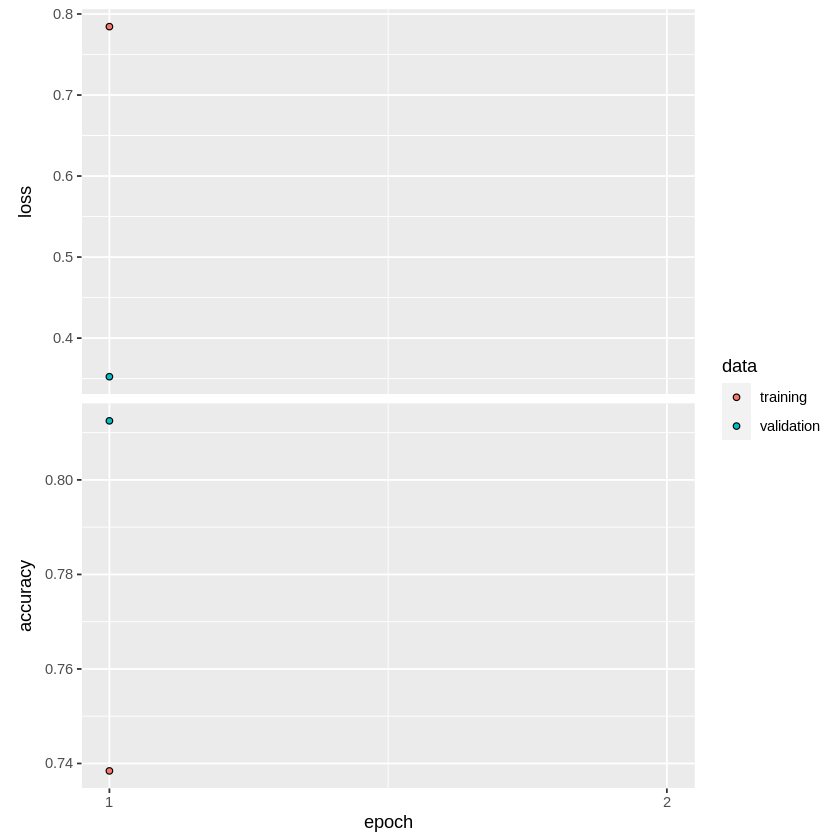

In [12]:
plot(history)

# Test Set


In [13]:
# #Make predictions on the test set,
# pred_file = "data/191202_Pneumonia_preds.Rdata"
# if(file.exists(pred_file)){load(pred_file)}else{
#   preds = predict(model,
#                             test_generator,
#                             steps = length(list.files(test_dir, recursive = T)))
#   save(preds, file=pred_file)
# }
preds = predict(model,
                test_generator,
                steps = length(list.files(test_dir, recursive = T)))


#Do some tidying,
predictions = data.frame(test_generator$filenames)
predictions$prob_pneumonia = preds[,2]
colnames(predictions) = c('Filename', 'Prob_Pneumonia')

predictions$Class_predicted = 'Normal'
predictions$Class_predicted[predictions$Prob_Pneumonia >= 0.5] = 'Pneumonia'
predictions$Class_actual = 'Normal'
predictions$Class_actual[grep("PNEUMONIA", predictions$Filename)] = 'Pneumonia'

predictions$Class_actual = as.factor(predictions$Class_actual)
predictions$Class_predicted = as.factor(predictions$Class_predicted)

In [ ]:
install.packages("pROC")
library(pROC)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [ ]:
roc = roc(response = predictions$Class_actual,
          predictor = as.vector(predictions$Prob_Pneumonia),
          ci=T,
          levels = c('Normal', 'Pneumonia'))
threshold = coords(roc, x = 'best', best.method='youden')
threshold

Setting direction: controls < cases



threshold,specificity,sensitivity
<dbl>,<dbl>,<dbl>
0.05192453,0.5940171,0.9179487


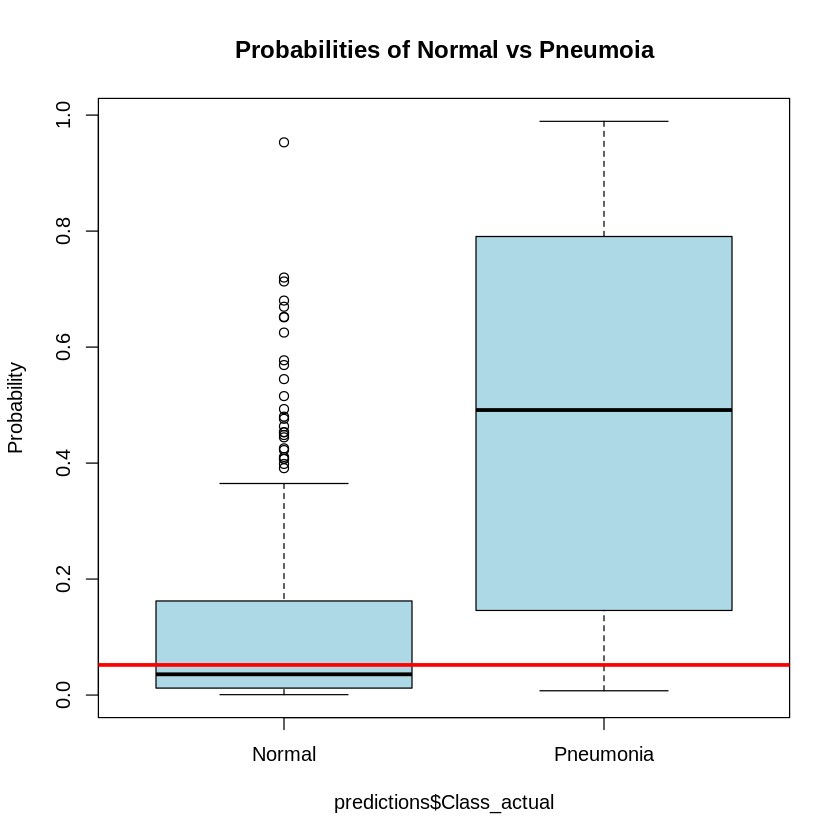

In [ ]:
boxplot(predictions$Prob_Pneumonia ~ predictions$Class_actual,
       main = 'Probabilities of Normal vs Pneumoia',
       ylab = 'Probability',
       col = 'light blue')
abline(h=threshold[1], col = 'red', lwd = 3)

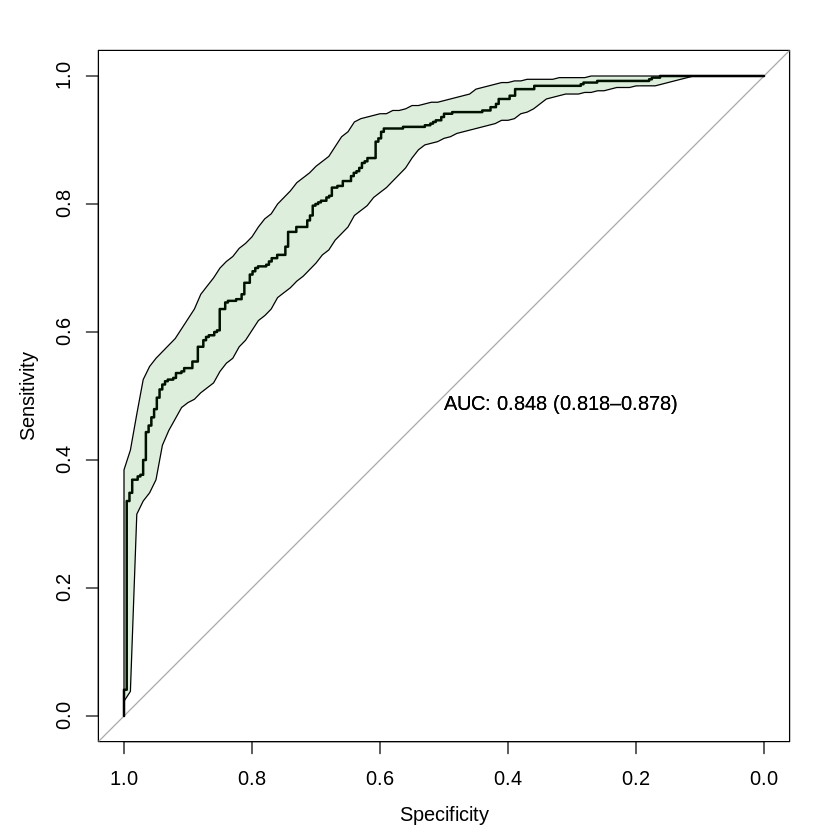

In [ ]:
plot(roc, print.auc=T)

ci_sens = ci.se(roc, specificities = seq(from=0, to=1, by=0.01), boot.n = 2000)
plot(ci_sens, type="shape", col="#00860022", no.roc=TRUE)

In [ ]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice



In [ ]:
predictions$Class_predicted = 'Normal'
predictions$Class_predicted[predictions$Prob_Pneumonia >= threshold[1]] = 'Pneumonia'
predictions$Class_predicted = factor(predictions$Class_predicted)

caret::confusionMatrix(predictions$Class_predicted, predictions$Class_actual, positive = 'Pneumonia')

Warning message in confusionMatrix.default(predictions$Class_predicted, predictions$Class_actual, :
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

           Reference
Prediction  Normal Pneumonia
  Normal         0         0
  Pneumonia    234       390
                                          
               Accuracy : 0.625           
                 95% CI : (0.5857, 0.6631)
    No Information Rate : 0.625           
    P-Value [Acc > NIR] : 0.5179          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.000           
            Specificity : 0.000           
         Pos Pred Value : 0.625           
         Neg Pred Value :   NaN           
             Prevalence : 0.625           
         Detection Rate : 0.625           
   Detection Prevalence : 1.000           
      Balanced Accuracy : 0.500           
                                          
       'Positive' Class : Pneumonia       